<a href="https://colab.research.google.com/github/tinetor/MLOPS_FRAUD/blob/main/MLOPS_FRAUD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install dagshub mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.8/259.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.4/28.4 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 109.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 95.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 648.7/648.7 kB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
import mlflow

In [5]:
import dagshub
dagshub.init(repo_owner='tiago_netor', repo_name='antifraud_ml', mlflow=True)

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=f2851822-0be3-4b2e-bb9b-d609c69a6812&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=c280c25fcfb3f8393e2b110d9cdf1feac55386b1fbe700aeb569f06836dbdd2c




Output()

Accessing as tiago_netor

Initialized MLflow to track repo "tiago_netor/antifraud_ml"

Repository tiago_netor/antifraud_ml initialized!

In [6]:
import dagshub.colab
#DAGSHUB_REPO = dagshub.colab.login()

In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("whenamancodes/fraud-detection")

print("Path to dataset files:", path)


import pandas as pd
import os

# Assuming 'path' variable holds the correct directory path
try:
    # List files in the directory to verify
    print("Files in directory:", os.listdir(path))

    # Find the CSV file within the directory
    for filename in os.listdir(path):
        if filename.endswith(".csv"):
            csv_file_path = os.path.join(path, filename)
            break
    else:
        raise FileNotFoundError("No CSV file found in the specified directory.")

    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(csv_file_path)
    print("CSV file read successfully!")
    print(df.head())

except FileNotFoundError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

100%|██████████| 66.0M/66.0M [00:00<00:00, 97.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/whenamancodes/fraud-detection/versions/1
Files in directory: ['creditcard.csv']
CSV file read successfully!
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.

In [11]:
top_features = ['V14', 'V7', 'V10', 'V12']
df = df[top_features + ["Class"]]

In [12]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
# Define X (features) and y (target)
X = df.drop(columns=["Class"])  # Remove target column
y = df["Class"]  # Define target

# Split dataset into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
mlflow.xgboost.autolog()

2025/02/26 10:15:31 WARNING mlflow.utils.autologging_utils: MLflow xgboost autologging is known to be compatible with 1.4.2 <= xgboost <= 2.1.3, but the installed version is 2.1.4. If you encounter errors during autologging, try upgrading / downgrading xgboost to a compatible version, or try upgrading MLflow.


In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve
import joblib
import matplotlib.pyplot as plt

2025/02/26 10:59:29 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:59:29] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats."


🏃 View run skillful-auk-234 at: https://dagshub.com/tiago_netor/antifraud_ml.mlflow/#/experiments/0/runs/ef2ba946de654206b9da7228caa564b3
🧪 View experiment at: https://dagshub.com/tiago_netor/antifraud_ml.mlflow/#/experiments/0


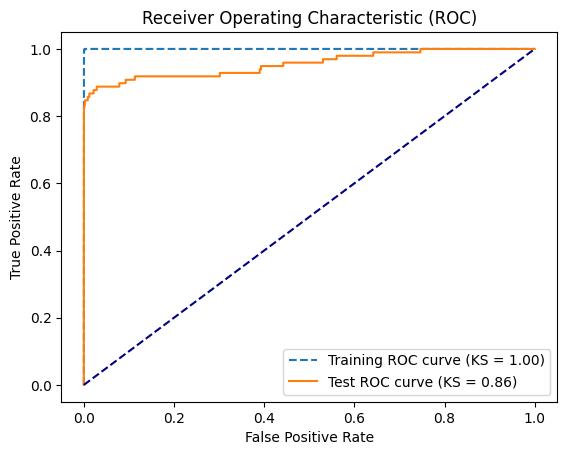

<Figure size 1000x800 with 0 Axes>

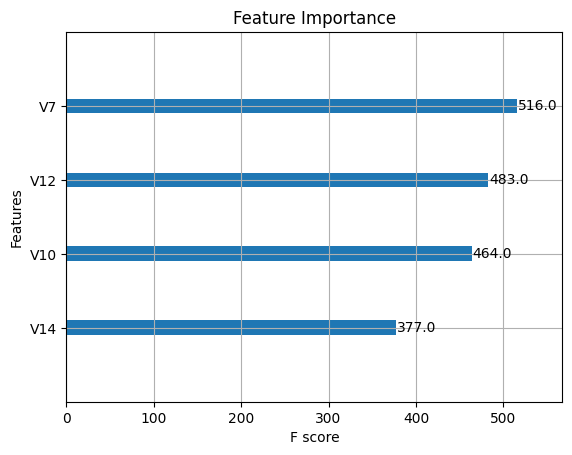

In [17]:
import mlflow
import xgboost as xgb
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve

# Enable MLflow autologging (optional)
# mlflow.autolog()

with mlflow.start_run():
    # 1. Train the model
    model = xgb.XGBClassifier()
    model.fit(X_train, y_train)

    # 2. Evaluate on the training set
    y_train_pred = model.predict(X_train)
    y_train_prob = model.predict_proba(X_train)[:, 1]

    # Compute training set metrics
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_fpr, train_tpr, _ = roc_curve(y_train, y_train_prob)
    train_ks_statistic = max(train_tpr - train_fpr)

    # Log training set metrics
    mlflow.log_metric("train_precision", train_precision)
    mlflow.log_metric("train_recall", train_recall)
    mlflow.log_metric("train_f1_score", train_f1)
    mlflow.log_metric("train_ks_statistic", train_ks_statistic)

    # 3. Evaluate on the test set
    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:, 1]

    # Compute test set metrics
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob)
    test_ks_statistic = max(test_tpr - test_fpr)

    # Log test set metrics
    mlflow.log_metric("test_precision", test_precision)
    mlflow.log_metric("test_recall", test_recall)
    mlflow.log_metric("test_f1_score", test_f1)
    mlflow.log_metric("test_ks_statistic", test_ks_statistic)

    # 4. Save and log the model artifact
    model_path = "xgboost_model.pkl"
    joblib.dump(model, model_path)
    mlflow.log_artifact(model_path)

    # 5. Log performance plots as artifacts
    # Plot ROC curve for both training and test sets
    plt.figure()
    plt.plot(train_fpr, train_tpr, label=f'Training ROC curve (KS = {train_ks_statistic:.2f})', linestyle='--')
    plt.plot(test_fpr, test_tpr, label=f'Test ROC curve (KS = {test_ks_statistic:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.savefig("roc_curve.png")
    mlflow.log_artifact("roc_curve.png")

    # 6. Log feature importance plot as artifact
    plt.figure(figsize=(10, 8))
    xgb.plot_importance(model, importance_type='weight')
    plt.title('Feature Importance')
    plt.savefig("feature_importance.png")
    mlflow.log_artifact("feature_importance.png")


2025/02/26 10:15:35 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:15:35] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats."


🏃 View run dapper-fish-627 at: https://dagshub.com/tiago_netor/antifraud_ml.mlflow/#/experiments/0/runs/6f5bd45b3ec34a318a269fa9f9e0d5bb
🧪 View experiment at: https://dagshub.com/tiago_netor/antifraud_ml.mlflow/#/experiments/0


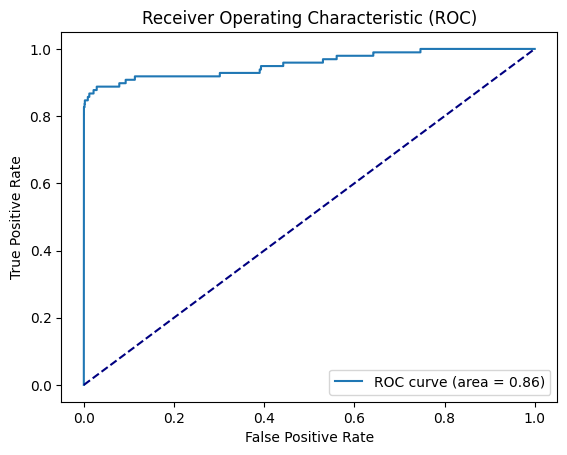

<Figure size 1000x800 with 0 Axes>

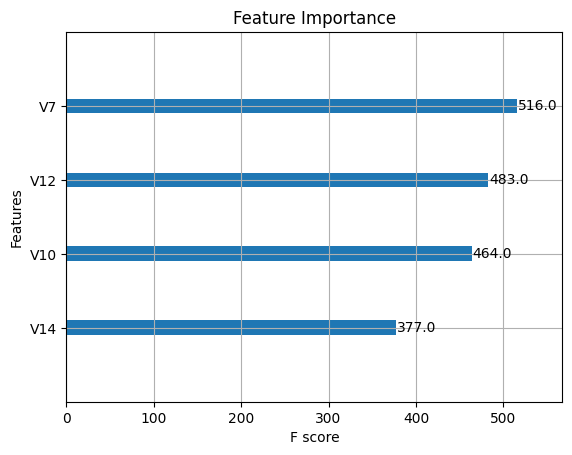

In [15]:
#mlflow.autolog()

with mlflow.start_run():
    # 1. Train the model
    model = xgb.XGBClassifier()
    model.fit(X_train, y_train)

    # 2. Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Get probability for KS

    # 3. Calculate metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calculate KS Statistic
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    ks_statistic = max(tpr - fpr)  # KS is the max difference between TPR and FPR

    # Log metrics manually
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("ks_statistic", ks_statistic)

    # 4. Log the model artifact
    model_path = "xgboost_model.pkl"
    joblib.dump(model, model_path)
    mlflow.log_artifact(model_path)  # Log model file

    # 5. Log performance plots as artifacts
    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {ks_statistic:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.savefig("roc_curve.png")
    mlflow.log_artifact("roc_curve.png")  # Log ROC curve plot

    # 6. Log feature importance plot as artifact
    plt.figure(figsize=(10, 8))
    xgb.plot_importance(model, importance_type='weight')
    plt.title('Feature Importance')
    plt.savefig("feature_importance.png")
    mlflow.log_artifact("feature_importance.png")  # Log feature importance plot

